In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sehwag = 'datasets/ICCenturies_VirenderSehwag.csv'
kohli = 'datasets/ICCenturies_ViratKohli.csv'
tendulkar = 'datasets/ICCenturies_SachinTendulkar.csv'
sharma = 'datasets/ICCenturies_RohitSharma.csv'
dravid = 'datasets/ICCenturies_RahulDravid.csv'

In [41]:
def createDataFrame(dataset_path: str) -> pd.DataFrame:
    df = pd.read_csv(dataset_path)

    cricketer = dataset_path.split('_')[-1].split('.')[0]
    name = cricketer[0] + ''.join([_ if _ == _.lower() else ' '+_ for _ in cricketer[1:]])
    df['Cricketer'] = name

    df['Runs'] = df['Runs'].str.strip().str.strip('*')
    df['Runs'] = df['Runs'].astype(int)

    df['Balls'] = df['Balls'].fillna(0)
    df['Balls'] = df['Balls'].astype('Int64')

    df['Against'] = df['Against'].str.strip()

    df['Won'] = df['Result']=='Won'
    df['Lost'] = df['Result']=='Lost'
    df['Drawn'] = df['Result']=='Drawn'

    df['City'] = df['Venue'].str.replace(r"([\w --',.]+, )([\w ]+)", r"\2", regex=True)

    df['Year'] = pd.to_datetime(df['Date'], format='%d-%b-%y').dt.year

    df.drop(columns=['Result', 'Position', 'Innings', 'Venue', 'Ground', 'Date'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.set_index('No.', inplace=True)

    return df[['Cricketer','Runs','Balls','Against','City','Year','Won', 'Lost', 'Drawn']]


In [42]:
createDataFrame(sehwag).head()

,Cricketer,Runs,Balls,Against,City,Year,Won,Lost,Drawn
No.,,,,,,,,,
1,Virender Sehwag,100,70,New Zealand,Colombo,2001,True,False,False
2,Virender Sehwag,105,173,South Africa,Bloemfontein,2001,False,True,False
3,Virender Sehwag,106,183,England,Nottingham,2002,False,False,True
4,Virender Sehwag,126,104,England,Colombo,2002,True,False,False
5,Virender Sehwag,147,206,West Indies,Mumbai,2002,True,False,False


In [43]:
df = pd.concat([createDataFrame(sehwag), 
                 createDataFrame(kohli), 
                  createDataFrame(tendulkar), 
                   createDataFrame(sharma), 
                    createDataFrame(dravid)]).reset_index(drop=True)
df

,Cricketer,Runs,Balls,Against,City,Year,Won,Lost,Drawn
0,Virender Sehwag,100,70,New Zealand,Colombo,2001,True,False,False
1,Virender Sehwag,105,173,South Africa,Bloemfontein,2001,False,True,False
2,Virender Sehwag,106,183,England,Nottingham,2002,False,False,True
3,Virender Sehwag,126,104,England,Colombo,2002,True,False,False
4,Virender Sehwag,147,206,West Indies,Mumbai,2002,True,False,False
...,...,...,...,...,...,...,...,...,...
303,Rahul Dravid,112,0,West Indies,Kingston,2011,True,False,False
304,Rahul Dravid,103,0,England,London,2011,False,True,False
305,Rahul Dravid,117,0,England,Nottingham,2011,False,True,False
306,Rahul Dravid,146,0,England,London,2011,False,True,False


In [44]:
df.groupby('Cricketer')['Runs'].describe()


,count,mean,std,min,25%,50%,75%,max
Cricketer,,,,,,,,
Rahul Dravid,48.0,138.729167,40.140572,100.0,107.0,125.5,149.25,270.0
Rohit Sharma,43.0,136.930233,35.956585,100.0,111.0,125.0,151.00,264.0
Sachin Tendulkar,100.0,135.570000,33.330380,100.0,111.0,124.0,149.00,248.0
Virat Kohli,80.0,131.550000,35.094772,100.0,107.0,118.5,139.25,254.0
Virender Sehwag,37.0,155.270270,58.885316,100.0,112.0,130.0,175.00,319.0


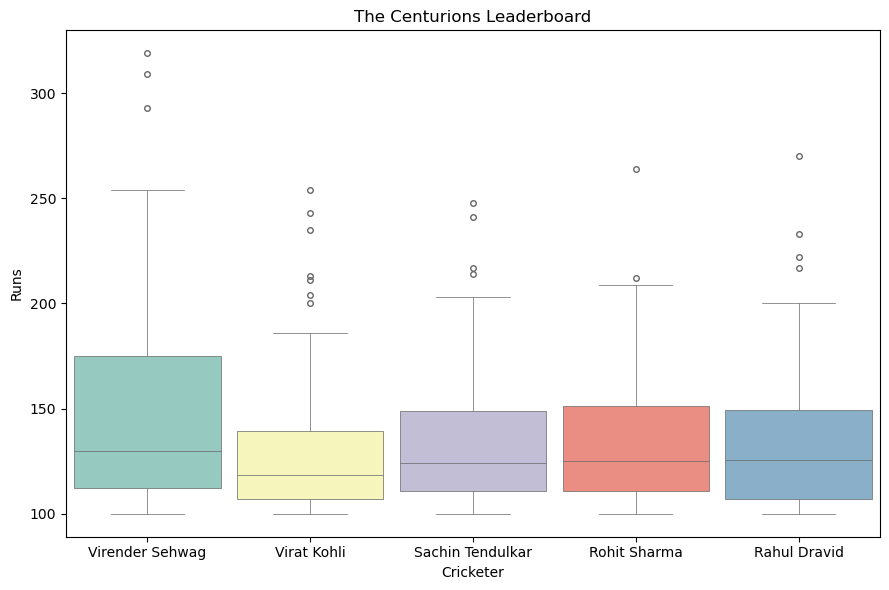

In [45]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='Cricketer', y='Runs', data=df, hue='Cricketer', palette='Set3', showfliers=True, fliersize=4, linewidth=0.5, width=0.9, whis=1.5)
plt.title("The Centurions Leaderboard", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [46]:
scoreboard =\
pd.merge(df['Against'].value_counts().head(10), 
         df.groupby('Against')['Won'].sum(), how='left', on='Against')\
  .merge(df.groupby('Against')['Lost'].sum(), how='left', on='Against')\
  .merge(df.groupby('Against')['Drawn'].sum(), how='left', on='Against')
scoreboard.drop(columns='count', inplace=True)
scoreboard = scoreboard[['Won', 'Lost', 'Drawn']]
scoreboard = scoreboard.assign(Total=lambda x: x.sum(axis=1)).sort_values('Total', ascending=False)
scoreboard.loc['Total'] = scoreboard.sum()
scoreboard

,Won,Lost,Drawn,Total
Against,,,,
Sri Lanka,37,6,10,53
Australia,24,18,8,50
West Indies,26,3,6,35
New Zealand,21,4,10,35
South Africa,16,11,7,34
England,15,6,8,29
Pakistan,13,7,3,23
Bangladesh,18,1,1,20
Zimbabwe,8,3,2,13


In [53]:
# Method 1: Using div()
normalized = scoreboard.iloc[:-1, :-1].div(scoreboard['Total'][:-1], axis=0) * 100

# Method 2: Alternative using apply()
# normalized = scoreboard.iloc[:-1, :-1].apply(lambda x: x/x.sum() * 100, axis=1)

normalized

,Won,Lost,Drawn
Against,,,
Sri Lanka,69.811321,11.320755,18.867925
Australia,48.000000,36.000000,16.000000
West Indies,74.285714,8.571429,17.142857
New Zealand,60.000000,11.428571,28.571429
South Africa,47.058824,32.352941,20.588235
England,51.724138,20.689655,27.586207
Pakistan,56.521739,30.434783,13.043478
Bangladesh,90.000000,5.000000,5.000000
Zimbabwe,61.538462,23.076923,15.384615


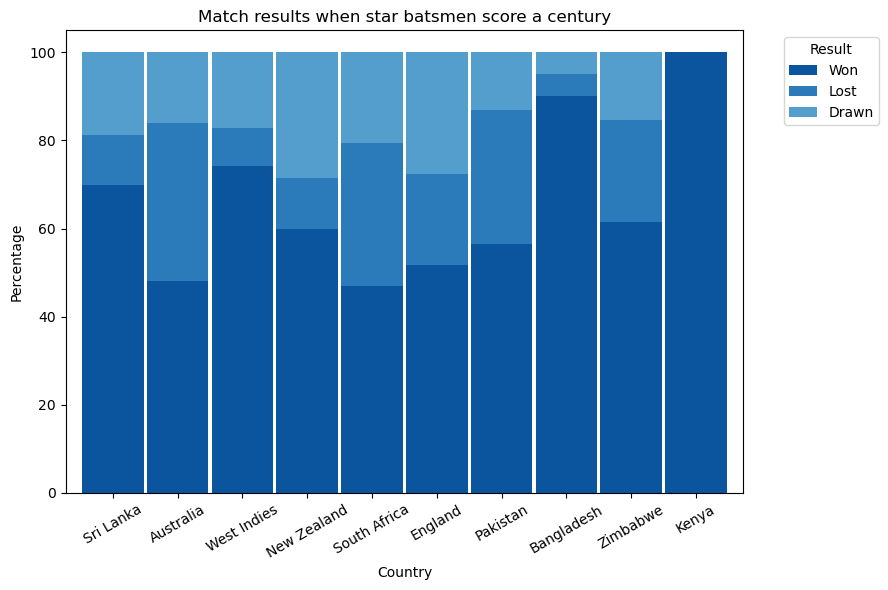

In [54]:
normalized.plot(kind='bar', stacked=True, color=sns.color_palette('Blues_r'), width=0.95, figsize=(9, 6), rot=30)
plt.title('Match results when star batsmen score a century')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.legend(title='Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()